# Extract relevant features


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Mall_Customers.csv")
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# 2. Distribution of the 'Age' feature


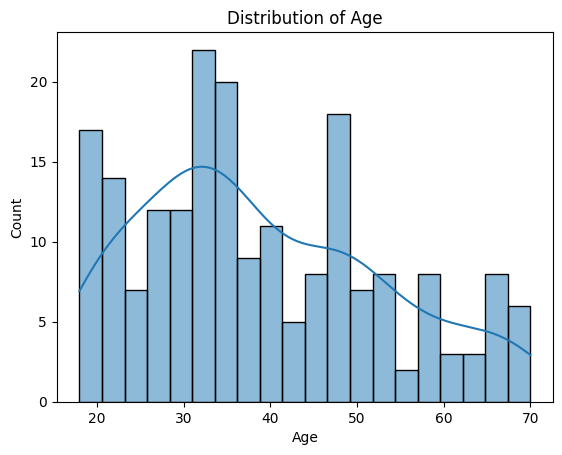

In [4]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# 3. Feature with the highest correlation with 'Spending Score'


In [8]:
corr_matrix = df.corr()
highest_corr_feature = corr_matrix['Spending Score (1-100)'].sort_values(ascending=False).index[1]
print(f"The feature with the highest correlation with 'Spending Score (1-100)' is: {highest_corr_feature}")

The feature with the highest correlation with 'Spending Score (1-100)' is: CustomerID


<ipython-input-8-9411116f9ee2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


# 4. Using Elbow Method to find optimal no of clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

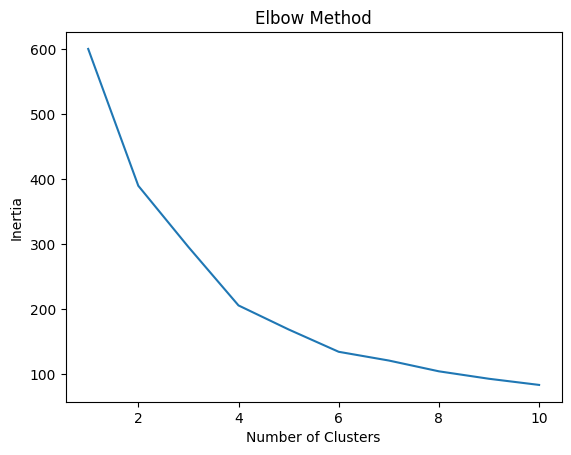

In [10]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# We can clearly see that the optimal number of clusters is 4

In [12]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 5. Average annual income of customers

In [13]:
avg_annual_income = df['Annual Income (k$)'].mean()
print(f"The average annual income of customers in the dataset is: {avg_annual_income:.2f}k$")

The average annual income of customers in the dataset is: 60.56k$


# 6. Average spending score of male customers in the dataset


In [14]:
avg_spending_male = df[df['Gender'] == 'Male']['Spending Score (1-100)'].mean()
print(f"The average spending score of male customers in the dataset is: {avg_spending_male:.2f}")

The average spending score of male customers in the dataset is: 48.51


# 7. Cluster with the highest average income and spending score


In [15]:
cluster_stats = df.groupby('Cluster').agg({'Annual Income (k$)': 'mean', 'Spending Score (1-100)': 'mean'})
highest_income_cluster = cluster_stats['Annual Income (k$)'].idxmax()
highest_spending_cluster = cluster_stats['Spending Score (1-100)'].idxmax()
print(f"The cluster with the highest average income is: Cluster {highest_income_cluster}")
print(f"The cluster with the highest average spending score is: Cluster {highest_spending_cluster}")

The cluster with the highest average income is: Cluster 0
The cluster with the highest average spending score is: Cluster 1


# 8. Percentage of customers in Cluster 1


In [16]:
cluster_1_percentage = (df['Cluster'] == 1).mean() * 100
print(f"The percentage of customers in Cluster 1 is: {cluster_1_percentage:.2f}%")

The percentage of customers in Cluster 1 is: 20.00%


# 9. Most frequent age group in Cluster 2


In [17]:
cluster_2_age_group = df[df['Cluster'] == 2]['Age'].mode()[0]
print(f"The most frequent age group in Cluster 2 is: {cluster_2_age_group}")

The most frequent age group in Cluster 2 is: 19


# 10. Average income of customers in Cluster 3


In [18]:
avg_income_cluster_3 = df[df['Cluster'] == 3]['Annual Income (k$)'].mean()
print(f"The average income of customers in Cluster 3 is: {avg_income_cluster_3:.2f} k$")

The average income of customers in Cluster 3 is: 47.71 k$


# 11. Count of values in each cluster


In [19]:
cluster_counts = df['Cluster'].value_counts().sort_index()
print("Count of values in each cluster:")
print(cluster_counts)

Count of values in each cluster:
0    38
1    40
2    57
3    65
Name: Cluster, dtype: int64


# 12. Show customers from each cluster


In [20]:
for cluster_id in range(cluster_counts.index.min(), cluster_counts.index.max() + 1):
    print(f"Customers in Cluster {cluster_id}:")
    print(df[df['Cluster'] == cluster_id])
    print()

Customers in Cluster 0:
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
112         113  Female   38                  64                      42   
121         122  Female   38                  67                      40   
124         125  Female   23                  70                      29   
126         127    Male   43                  71                      35   
130         131    Male   47                  71                       9   
132         133  Female   25                  72                      34   
134         135    Male   20                  73                       5   
136         137  Female   44                  73                       7   
138         139    Male   19                  74                      10   
140         141  Female   57                  75                       5   
142         143  Female   28                  76                      40   
144         145    Male   25                  77                

# 13. Visualization of the clusters


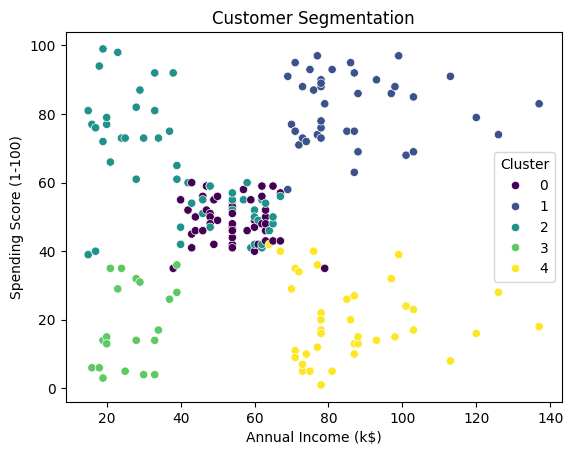

In [ ]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()